<a href="https://colab.research.google.com/github/mlvlab/DFC609-2022S/blob/master/1_Data_Loading_Loan_Data_from_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals 
-----
* Find a dataset on Kaggle, Internet, or prepare your own dataset
* Store your csv file on Google Drive
* Load your data on Colab
* Calculate basic statistics of your data
* Remove unnecessary columns or rows (preprocessing)

References
-----
* [Load Data from Kaggle](https://www.kaggle.com/zhijinzhai/loandata)
* [csv reader](https://docs.python.org/3/library/csv.html)


In [1]:
!git clone https://github.com/mlvlab/DFC609-2022S.git

Cloning into 'DFC609-2022S'...
remote: Enumerating objects: 670, done.
remote: Counting objects: 100% (372/372), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 670 (delta 209), reused 228 (delta 123), pack-reused 298
Receiving objects: 100% (670/670), 9.67 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (392/392), done.


In [2]:
pwd

'/content'

In [3]:
cd DFC609-2022S/

/content/DFC609-2022S


In [4]:
ls

 1_Data_Loading_Loan_Data_from_Kaggle.ipynb   6_Clustering.ipynb
 2_Naive_Bayes_Classification.ipynb          'Loan payments data.csv'
 3_Regression.ipynb                           PastClasses.md
 4_Support_Vector_Machine.ipynb               README.md
 5_Decision_Tree.ipynb                        weight-height.csv


In [5]:
import csv

In [6]:
with open('Loan payments data.csv', newline='') as csvfile:
  csvreader = csv.reader(csvfile, delimiter=',')
  for row in csvreader:
    print(','.join(row))

Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,,45,High School or Below,male
xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,,50,Bechalor,female
xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,,33,Bechalor,female
xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,,27,college,male
xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,,28,college,female
xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,,35,Master or Above,male
xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,,29,college,male
xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,,36,college,male
xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,,28,college,male
xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,,26,college,male
xqd20160011,PAIDOFF,300,7,9/10/2016,9/16/2016,9/11/2016 19:11,,29,

In [7]:
row

['xqd20160500',
 'COLLECTION_PAIDOFF',
 '1000',
 '30',
 '9/12/2016',
 '10/11/2016',
 '10/19/2016 11:58',
 '8',
 '28',
 'High School or Below',
 'male']

In [8]:
type(row)

list

In [9]:
rows = []
with open('Loan payments data.csv', newline='') as csvfile:
  csvreader = csv.reader(csvfile, delimiter=',')
  for row in csvreader:
    rows.append(row)

csvheader = rows[0]
csvdata = rows[1:]

In [10]:
icol = 10

In [11]:
set([sample[icol] for sample in csvdata])

{'female', 'male'}

In [12]:
column = [sample[icol] for sample in csvdata]

In [13]:
from collections import Counter

In [14]:
c = Counter(column)

In [15]:
labels = list(c.keys())
counts = list(c.values())

In [16]:
counts

[423, 77]

In [17]:
labels

['male', 'female']

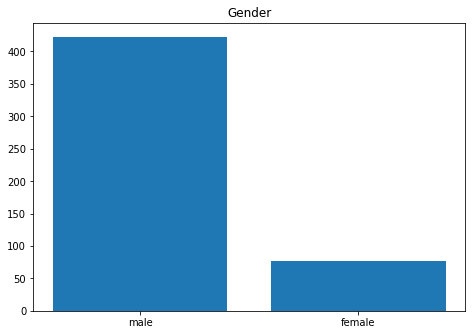

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,counts)
plt.title('Gender')
plt.show()

In [19]:
labels

['male', 'female']

In [20]:
values = [1,-1]

In [21]:
labels_and_vals = zip(labels, values)

In [22]:
mapping={}
for k, v in zip(labels, values):
  mapping[k] = v

In [23]:
mapping

{'female': -1, 'male': 1}

In [24]:
num_column =[] 
for v in column:
  num_column.append(mapping[v])

In [25]:
num_column[:10], column[:10]

([1, -1, -1, 1, -1, 1, 1, 1, 1, 1],
 ['male',
  'female',
  'female',
  'male',
  'female',
  'male',
  'male',
  'male',
  'male',
  'male'])

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('Loan payments data.csv', delimiter = ',')

In [28]:
df

Loan_ID         loan_status  Principal  terms effective_date  \
0    xqd20166231             PAIDOFF       1000     30       9/8/2016   
1    xqd20168902             PAIDOFF       1000     30       9/8/2016   
2    xqd20160003             PAIDOFF       1000     30       9/8/2016   
3    xqd20160004             PAIDOFF       1000     15       9/8/2016   
4    xqd20160005             PAIDOFF       1000     30       9/9/2016   
..           ...                 ...        ...    ...            ...   
495  xqd20160496  COLLECTION_PAIDOFF       1000     30      9/12/2016   
496  xqd20160497  COLLECTION_PAIDOFF       1000     15      9/12/2016   
497  xqd20160498  COLLECTION_PAIDOFF        800     15      9/12/2016   
498  xqd20160499  COLLECTION_PAIDOFF       1000     30      9/12/2016   
499  xqd20160500  COLLECTION_PAIDOFF       1000     30      9/12/2016   

       due_date     paid_off_time  past_due_days  age             education  \
0     10/7/2016   9/14/2016 19:31            NaN   45  High School or Below   
1     10/7/2016    10/7/2016 9:00            NaN   50              Bechalor   
2     10/7/2016   9/25/2016 16:58            NaN   33              Bechalor   
3     9/22/2016   9/22/2016 20:00            NaN   27               college   
4     10/8/2016   9/23/2016 21:36            NaN   28               college   
..          ...               ...            ...  ...                   ...   
495  10/11/2016  10/14/2016 19:08            3.0   28  High School or Below   
496   9/26/2016  10/10/2016 20:02           14.0   26  High School or Below   
497   9/26/2016   9/29/2016 11:49            3.0   30               college   
498  11/10/2016  11/11/2016 22:40            1.0   38               college   
499  10/11/2016  10/19/2016 11:58            8.0   28  High School or Below   

     Gender  
0      male  
1    female  
2    female  
3      male  
4    female  
..      ...  
495    male  
496    male  
497    male  
498  female  
499    male  

[500 rows x 11 columns]

In [29]:
df['Gender']

0        male
1      female
2      female
3        male
4      female
        ...  
495      male
496      male
497      male
498    female
499      male
Name: Gender, Length: 500, dtype: object

In [30]:
df_female = df[df['Gender']=='female']

In [31]:
df_female

Loan_ID         loan_status  Principal  terms effective_date  \
1    xqd20168902             PAIDOFF       1000     30       9/8/2016   
2    xqd20160003             PAIDOFF       1000     30       9/8/2016   
4    xqd20160005             PAIDOFF       1000     30       9/9/2016   
13   xqd20160014             PAIDOFF        900      7      9/10/2016   
21   xqd20160022             PAIDOFF       1000     30      9/10/2016   
..           ...                 ...        ...    ...            ...   
465  xqd20169466  COLLECTION_PAIDOFF       1000     30      9/12/2016   
474  xqd20160475  COLLECTION_PAIDOFF        800     15      9/12/2016   
475  xqd20160476  COLLECTION_PAIDOFF       1000     30      9/12/2016   
476  xqd20160477  COLLECTION_PAIDOFF        800     15      9/12/2016   
498  xqd20160499  COLLECTION_PAIDOFF       1000     30      9/12/2016   

       due_date     paid_off_time  past_due_days  age             education  \
1     10/7/2016    10/7/2016 9:00            NaN   50              Bechalor   
2     10/7/2016   9/25/2016 16:58            NaN   33              Bechalor   
4     10/8/2016   9/23/2016 21:36            NaN   28               college   
13    9/16/2016   9/13/2016 21:57            NaN   26               college   
21    10/9/2016   10/8/2016 17:09            NaN   43  High School or Below   
..          ...               ...            ...  ...                   ...   
465  10/11/2016  10/12/2016 12:54            1.0   49  High School or Below   
474   9/26/2016   9/28/2016 11:34            2.0   26  High School or Below   
475  10/11/2016   11/9/2016 18:12           29.0   35               college   
476  10/26/2016  10/31/2016 13:07            5.0   46               college   
498  11/10/2016  11/11/2016 22:40            1.0   38               college   

     Gender  
1    female  
2    female  
4    female  
13   female  
21   female  
..      ...  
465  female  
474  female  
475  female  
476  female  
498  female  

[77 rows x 11 columns]

In [32]:
df_copied = df

In [33]:
df_copied.replace('male', 1, inplace=True)

In [34]:
df_copied.replace('female', -1, inplace=True)

In [35]:
df_copied

Loan_ID         loan_status  Principal  terms effective_date  \
0    xqd20166231             PAIDOFF       1000     30       9/8/2016   
1    xqd20168902             PAIDOFF       1000     30       9/8/2016   
2    xqd20160003             PAIDOFF       1000     30       9/8/2016   
3    xqd20160004             PAIDOFF       1000     15       9/8/2016   
4    xqd20160005             PAIDOFF       1000     30       9/9/2016   
..           ...                 ...        ...    ...            ...   
495  xqd20160496  COLLECTION_PAIDOFF       1000     30      9/12/2016   
496  xqd20160497  COLLECTION_PAIDOFF       1000     15      9/12/2016   
497  xqd20160498  COLLECTION_PAIDOFF        800     15      9/12/2016   
498  xqd20160499  COLLECTION_PAIDOFF       1000     30      9/12/2016   
499  xqd20160500  COLLECTION_PAIDOFF       1000     30      9/12/2016   

       due_date     paid_off_time  past_due_days  age             education  \
0     10/7/2016   9/14/2016 19:31            NaN   45  High School or Below   
1     10/7/2016    10/7/2016 9:00            NaN   50              Bechalor   
2     10/7/2016   9/25/2016 16:58            NaN   33              Bechalor   
3     9/22/2016   9/22/2016 20:00            NaN   27               college   
4     10/8/2016   9/23/2016 21:36            NaN   28               college   
..          ...               ...            ...  ...                   ...   
495  10/11/2016  10/14/2016 19:08            3.0   28  High School or Below   
496   9/26/2016  10/10/2016 20:02           14.0   26  High School or Below   
497   9/26/2016   9/29/2016 11:49            3.0   30               college   
498  11/10/2016  11/11/2016 22:40            1.0   38               college   
499  10/11/2016  10/19/2016 11:58            8.0   28  High School or Below   

     Gender  
0         1  
1        -1  
2        -1  
3         1  
4        -1  
..      ...  
495       1  
496       1  
497       1  
498      -1  
499       1  

[500 rows x 11 columns]

In [36]:
df_copied.to_csv('Loan_payments_data_pandas_test.csv')